In [91]:
import csv
import random

file_input = 'Hasil/keypoints_train.csv'

interval = 15
count = 0

with open(file_input, mode='r', newline='') as file:
    reader = csv.reader(file)
    
    datas = []
    next(reader)

    for row in reader:

        if count >= interval:
            datas.append(row)
            count = 0
        else:
            count += 1

random.shuffle(datas)

for data in datas:
    print(data)

['-1.092712879', '-0.333298355', '-1.217178583', '-0.190925524', '-1.223466039', '-0.411836386', '-1.298829436', '0.115752332 ', '-1.322073579', '-0.441934109', '-0.960933387', '0.463228345 ', '-1.038184047', '-0.522640765', '-0.200547397', '0.652768016 ', '-0.653642476', '-0.640127897', '0.340211928 ', '0.298696995 ', '0.087550014 ', '-0.760261774', '0.008598077 ', '0.286301315 ', '-0.008598077', '-0.286301821', '1.045147896 ', '0.169028446 ', '0.806097269 ', '-0.778541207', '1.071523190 ', '0.283677876 ', '0.650224209 ', '-0.754863739', 'Duduk       ']
['-1.229781270', '-0.207892075', '-1.304373860', '-0.092775367', '-1.335404158', '-0.255598754', '-1.344461918', '0.140504166 ', '-1.357852936', '-0.205494419', '-0.937593341', '0.376428902 ', '-1.058367252', '-0.249373883', '-0.246885836', '0.518229008 ', '-0.476151168', '-0.383143157', '0.200477004 ', '0.181466341 ', '0.149764583 ', '-0.486805111', '0.016942274 ', '0.219761670 ', '-0.016942274', '-0.219761670', '0.696610332 ', '-0.01

In [3]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [50]:
%pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [41]:
import csv
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD
import random


data_train = []
data_val = []

interval = 5

file_keypoints = "Hasil/keypoints_train.csv"
# file_keypoints = "Hasil/keypoints_train_3_gerakan.csv"

with open(file_keypoints, mode='r', encoding='utf-8-sig') as file:
    reader = csv.reader(file)
    header = next(reader)  # skip header

    for row in reader:
        data_train.append(row)

random.shuffle(data_train)

data_train = [row for i, row in enumerate(data_train)]

X_train = [row[:-1] for row in data_train]
X_train = np.array([[float(x) for x in y] for y in X_train])
y_train_arr = np.array([row[-1] for row in data_train])

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train_arr)

file_keypoints_val = "Hasil/keypoints_val.csv"
# file_keypoints_val = "Hasil/keypoints_val_3_gerakan.csv"

with open(file_keypoints_val, mode='r', encoding='utf-8-sig') as file1:
    reader = csv.reader(file1)
    header = next(reader)  # skip header

    for row in reader:
        data_val.append(row)

random.shuffle(data_val)

data_val = [row for i, row in enumerate(data_val)]

X_val = [row[:-1] for row in data_val]
X_val = np.array([[float(x) for x in y] for y in X_val])
y_val_arr = np.array([row[-1] for row in data_val])

y_val = encoder.fit_transform(y_val_arr)

Epoch 1/100


c:\Users\lvcm3\anaconda3\envs\deim\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4185 - loss: 1.2580 - val_accuracy: 0.3070 - val_loss: 1.2525
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4797 - loss: 1.2014 - val_accuracy: 0.3099 - val_loss: 1.1954
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5529 - loss: 1.1611 - val_accuracy: 0.4259 - val_loss: 1.1412
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6143 - loss: 1.1147 - val_accuracy: 0.8061 - val_loss: 1.0894
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7104 - loss: 1.0658 - val_accuracy: 0.8251 - val_loss: 1.0426
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7671 - loss: 1.0194 - val_accuracy: 0.8260 - val_loss: 0.9965
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8168 - loss: 0.9759 - val_accuracy: 0.8260 - val_loss: 0.9555
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8553 - loss: 0.9313 - val_accuracy: 0.8260 - val_loss: 0.9

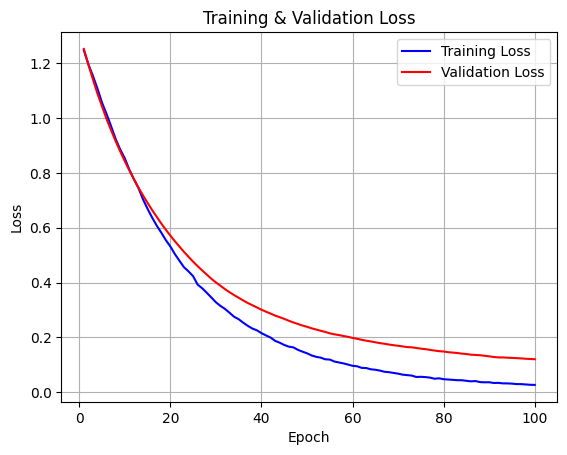

In [42]:
early_stop = EarlyStopping(
    monitor='val_loss',  # bisa juga 'val_accuracy'
    patience=5,           # stop jika tidak membaik dalam 5 epoch
    restore_best_weights=True
)

model_gerakan = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(len(np.unique(y_train)), activation='softmax'),
])

model_gerakan.compile(optimizer=Adam(learning_rate=0.00003), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model_gerakan.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_val, y_val), callbacks=[early_stop])

import matplotlib.pyplot as plt

# Ambil data loss dan val_loss dari history
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [169]:
model.save('deteksi_gerakan.h5')

In [8]:
# Memuat kembali
from tensorflow.keras.models import load_model
model_gerakan = load_model('deteksi_gerakan.h5')

165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step


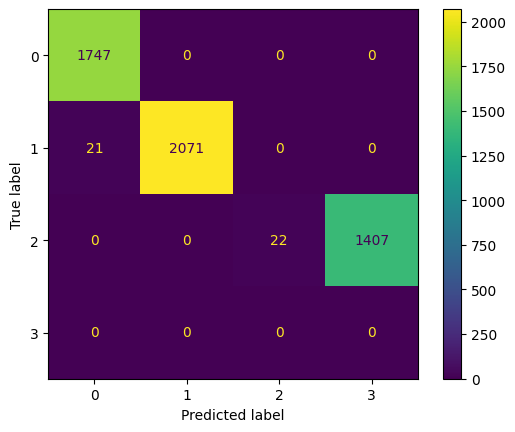

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

data_test = []

file_keypoints_test = "test1.csv"
# file_keypoints_test = "Hasil/keypoints_test.csv"

with open(file_keypoints_test, mode='r', encoding='utf-8-sig') as file1:
    reader = csv.reader(file1)

    for row in reader:
        data_test.append(row)

# random.shuffle(data_test)

X_test = [row[:-1] for row in data_test]
X_test = np.array([[float(x) for x in y] for y in X_test])
y_test_arr = np.array([row[-1] for row in data_test])
y_test = encoder.fit_transform(y_test_arr)

y_pred = model_gerakan.predict(X_test).argmax(axis=1)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)


In [ ]:
import numpy as np

print(len(X_test))
count_berdiri_benar = 0
count_berdiri_salah = 0
count_duduk_benar = 0
count_duduk_salah = 0
count_sujud_benar = 0
count_sujud_salah = 0

for i in range(len(X_test)):

    # Ambil satu sample dari test set
    sample = X_test[i].reshape(1, -1)

    # Prediksi
    pred = model_gerakan.predict(sample)
    label_index = np.argmax(pred)
    predicted_label = encoder.inverse_transform([label_index])

    if predicted_label[0] == "Berdiri     " and encoder.inverse_transform([y_test[i]]) == ["Berdiri     "]:
        count_berdiri_benar += 1
    elif predicted_label[0] != "Berdiri     " and encoder.inverse_transform([y_test[i]]) == ["Berdiri     "]:
        count_berdiri_salah += 1
    elif predicted_label[0] == "Duduk       " and encoder.inverse_transform([y_test[i]]) == ["Duduk       "]:
        count_duduk_benar += 1
    elif predicted_label[0] != "Duduk       " and encoder.inverse_transform([y_test[i]]) == ["Duduk       "]:
        count_duduk_salah += 1
    elif predicted_label[0] == "Sujud       " and encoder.inverse_transform([y_test[i]]) == ["Sujud       "]:
        count_sujud_benar += 1
    elif predicted_label[0] != "Sujud       " and encoder.inverse_transform([y_test[i]]) == ["Sujud       "]:
        count_sujud_salah += 1

    print("Label asli:", encoder.inverse_transform([y_test[i]]))
    print("Prediksi model:", predicted_label[0])


print("TP berdiri", count_berdiri_benar)
print("FN berdiri", count_berdiri_salah)
print("TP duduk", count_duduk_benar)
print("FN duduk", count_duduk_salah)
print("TP sujud", count_sujud_benar)
print("FN sujud", count_sujud_salah)


5268


NameError: name 'model_gerakan' is not defined

In [31]:
import csv

file_input = "test1.csv"

data = []
frame = 668
count = 0

with open(file_input, mode='r') as file:
    reader = csv.reader(file)

    for row in reader:
        if count == frame:
            data.append(row)
            break
        else:
            count += 1

X_test = np.array([[float(x) for x in z] for z in data]).reshape(1, -1)

print(X_test)

pred = model.predict(X_test)
label_index = np.argmax(pred)
predicted_label = encoder.inverse_transform([label_index])

print(predicted_label)

ValueError: could not convert string to float: 'Berdiri     '

In [2]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import cv2
import os

# Import matplotlib libraries
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib.patches as patches

# Some modules to display an animation using imageio.
import imageio
from IPython.display import HTML, display


In [3]:
# Dictionary that maps from joint names to keypoint indices.
KEYPOINT_DICT = {
    'nose': 0,
    'left_eye': 1,
    'right_eye': 2,
    'left_ear': 3,
    'right_ear': 4,
    'left_shoulder': 5,
    'right_shoulder': 6,
    'left_elbow': 7,
    'right_elbow': 8,
    'left_wrist': 9,
    'right_wrist': 10,
    'left_hip': 11,
    'right_hip': 12,
    'left_knee': 13,
    'right_knee': 14,
    'left_ankle': 15,
    'right_ankle': 16
}

# Maps bones to a matplotlib color name.
KEYPOINT_EDGE_INDS_TO_COLOR = {
    (0, 1): 'm',
    (0, 2): 'c',
    (1, 3): 'm',
    (2, 4): 'c',
    (0, 5): 'm',
    (0, 6): 'c',
    (5, 7): 'm',
    (7, 9): 'm',
    (6, 8): 'c',
    (8, 10): 'c',
    (5, 6): 'y',
    (5, 11): 'm',
    (6, 12): 'c',
    (11, 12): 'y',
    (11, 13): 'm',
    (13, 15): 'm',
    (12, 14): 'c',
    (14, 16): 'c'
}

def _keypoints_and_edges_for_display(keypoints_with_scores,
                                     height,
                                     width,
                                     keypoint_threshold=0.11):
  """Returns high confidence keypoints and edges for visualization.

  Args:
    keypoints_with_scores: A numpy array with shape [1, 1, 17, 3] representing
      the keypoint coordinates and scores returned from the MoveNet model.
    height: height of the image in pixels.
    width: width of the image in pixels.
    keypoint_threshold: minimum confidence score for a keypoint to be
      visualized.

  Returns:
    A (keypoints_xy, edges_xy, edge_colors) containing:
      * the coordinates of all keypoints of all detected entities;
      * the coordinates of all skeleton edges of all detected entities;
      * the colors in which the edges should be plotted.
  """
  keypoints_all = []
  keypoint_edges_all = []
  edge_colors = []
  num_instances, _, _, _ = keypoints_with_scores.shape
  for idx in range(num_instances):
    kpts_x = keypoints_with_scores[0, idx, :, 1]
    kpts_y = keypoints_with_scores[0, idx, :, 0]
    kpts_scores = keypoints_with_scores[0, idx, :, 2]
    kpts_absolute_xy = np.stack(
        [width * np.array(kpts_x), height * np.array(kpts_y)], axis=-1)
    kpts_above_thresh_absolute = kpts_absolute_xy[
        kpts_scores > keypoint_threshold, :]
    keypoints_all.append(kpts_above_thresh_absolute)

    for edge_pair, color in KEYPOINT_EDGE_INDS_TO_COLOR.items():
      if (kpts_scores[edge_pair[0]] > keypoint_threshold and
          kpts_scores[edge_pair[1]] > keypoint_threshold):
        x_start = kpts_absolute_xy[edge_pair[0], 0]
        y_start = kpts_absolute_xy[edge_pair[0], 1]
        x_end = kpts_absolute_xy[edge_pair[1], 0]
        y_end = kpts_absolute_xy[edge_pair[1], 1]
        line_seg = np.array([[x_start, y_start], [x_end, y_end]])
        keypoint_edges_all.append(line_seg)
        edge_colors.append(color)
  if keypoints_all:
    keypoints_xy = np.concatenate(keypoints_all, axis=0)
  else:
    keypoints_xy = np.zeros((0, 17, 2))

  if keypoint_edges_all:
    edges_xy = np.stack(keypoint_edges_all, axis=0)
  else:
    edges_xy = np.zeros((0, 2, 2))
  return keypoints_xy, edges_xy, edge_colors


def draw_prediction_on_image(
    image, keypoints_with_scores, crop_region=None, close_figure=False,
    output_image_height=None):
  """Draws the keypoint predictions on image.

  Args:
    image: A numpy array with shape [height, width, channel] representing the
      pixel values of the input image.
    keypoints_with_scores: A numpy array with shape [1, 1, 17, 3] representing
      the keypoint coordinates and scores returned from the MoveNet model.
    crop_region: A dictionary that defines the coordinates of the bounding box
      of the crop region in normalized coordinates (see the init_crop_region
      function below for more detail). If provided, this function will also
      draw the bounding box on the image.
    output_image_height: An integer indicating the height of the output image.
      Note that the image aspect ratio will be the same as the input image.

  Returns:
    A numpy array with shape [out_height, out_width, channel] representing the
    image overlaid with keypoint predictions.
  """
  height, width, channel = image.shape
  aspect_ratio = float(width) / height
  fig, ax = plt.subplots(figsize=(12 * aspect_ratio, 12))
  # To remove the huge white borders
  fig.tight_layout(pad=0)
  ax.margins(0)
  ax.set_yticklabels([])
  ax.set_xticklabels([])
  plt.axis('off')

  im = ax.imshow(image)
  line_segments = LineCollection([], linewidths=(4), linestyle='solid')
  ax.add_collection(line_segments)
  # Turn off tick labels
  scat = ax.scatter([], [], s=60, color='#FF1493', zorder=3)

  (keypoint_locs, keypoint_edges,
   edge_colors) = _keypoints_and_edges_for_display(
       keypoints_with_scores, height, width)

  line_segments.set_segments(keypoint_edges)
  line_segments.set_color(edge_colors)
  if keypoint_edges.shape[0]:
    line_segments.set_segments(keypoint_edges)
    line_segments.set_color(edge_colors)
  if keypoint_locs.shape[0]:
    scat.set_offsets(keypoint_locs)

  if crop_region is not None:
    xmin = max(crop_region['x_min'] * width, 0.0)
    ymin = max(crop_region['y_min'] * height, 0.0)
    rec_width = min(crop_region['x_max'], 0.99) * width - xmin
    rec_height = min(crop_region['y_max'], 0.99) * height - ymin
    rect = patches.Rectangle(
        (xmin,ymin),rec_width,rec_height,
        linewidth=1,edgecolor='b',facecolor='none')
    ax.add_patch(rect)

  fig.canvas.draw()
  image_from_plot = np.frombuffer(fig.canvas.buffer_rgba(), dtype=np.uint8)
  image_from_plot = image_from_plot.reshape(
      fig.canvas.get_width_height()[::-1] + (4,))
  image_from_plot = image_from_plot[:, :, :3]
  plt.close(fig)
  if output_image_height is not None:
    output_image_width = int(output_image_height / height * width)
    image_from_plot = cv2.resize(
        image_from_plot, dsize=(output_image_width, output_image_height),
         interpolation=cv2.INTER_CUBIC)
  return image_from_plot

def progress(value, max=100):
  return HTML("""
      <progress
          value='{value}'
          max='{max}',
          style='width: 100%'
      >
          {value}
      </progress>
  """.format(value=value, max=max))

In [4]:
model_name = "movenet_thunder"

if "tflite" in model_name:
  if "movenet_lightning_f16" in model_name:
    !wget -q -O model.tflite https://tfhub.dev/google/lite-model/movenet/singlepose/lightning/tflite/float16/4?lite-format=tflite
    input_size = 192
  elif "movenet_thunder_f16" in model_name:
    !wget -q -O model.tflite https://tfhub.dev/google/lite-model/movenet/singlepose/thunder/tflite/float16/4?lite-format=tflite
    input_size = 256
  elif "movenet_lightning_int8" in model_name:
    !wget -q -O model.tflite https://tfhub.dev/google/lite-model/movenet/singlepose/lightning/tflite/int8/4?lite-format=tflite
    input_size = 192
  elif "movenet_thunder_int8" in model_name:
    !wget -q -O model.tflite https://tfhub.dev/google/lite-model/movenet/singlepose/thunder/tflite/int8/4?lite-format=tflite
    input_size = 256
  else:
    raise ValueError("Unsupported model name: %s" % model_name)

  # Initialize the TFLite interpreter
  interpreter = tf.lite.Interpreter(model_path="model.tflite")
  interpreter.allocate_tensors()

  def movenet(input_image):
    """Runs detection on an input image.

    Args:
      input_image: A [1, height, width, 3] tensor represents the input image
        pixels. Note that the height/width should already be resized and match the
        expected input resolution of the model before passing into this function.

    Returns:
      A [1, 1, 17, 3] float numpy array representing the predicted keypoint
      coordinates and scores.
    """
    # TF Lite format expects tensor type of uint8.
    input_image = tf.cast(input_image, dtype=tf.uint8)
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    interpreter.set_tensor(input_details[0]['index'], input_image.numpy())
    # Invoke inference.
    interpreter.invoke()
    # Get the model prediction.
    keypoints_with_scores = interpreter.get_tensor(output_details[0]['index'])
    return keypoints_with_scores

else:
  if "movenet_lightning" in model_name:
    module = hub.load("https://tfhub.dev/google/movenet/singlepose/lightning/4")
    input_size = 192
  elif "movenet_thunder" in model_name:
    module = hub.load("https://tfhub.dev/google/movenet/singlepose/thunder/4")
    input_size = 256
  else:
    raise ValueError("Unsupported model name: %s" % model_name)

  def movenet(input_image):
    """Runs detection on an input image.

    Args:
      input_image: A [1, height, width, 3] tensor represents the input image
        pixels. Note that the height/width should already be resized and match the
        expected input resolution of the model before passing into this function.

    Returns:
      A [1, 1, 17, 3] float numpy array representing the predicted keypoint
      coordinates and scores.
    """
    model = module.signatures['serving_default']

    # SavedModel format expects tensor type of int32.
    input_image = tf.cast(input_image, dtype=tf.int32)
    # Run model inference.
    outputs = model(input_image)
    # Output is a [1, 1, 17, 3] tensor.
    keypoints_with_scores = outputs['output_0'].numpy()
    return keypoints_with_scores

In [5]:
def load_movenet(image_path):
    # Load the input image.
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image)

    # Resize and pad the image to keep the aspect ratio and fit the expected size.
    input_image = tf.expand_dims(image, axis=0)
    input_image = tf.image.resize_with_pad(input_image, input_size, input_size)

    # Run model inference.
    keypoints_with_scores = movenet(input_image)
    
    return keypoints_with_scores

def visualize_movenet(keypoints_with_scores, image_path,  output_path):
    
    # Load the input image.
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image)
    
    # Visualize the predictions with image.
    display_image = tf.expand_dims(image, axis=0)
    display_image = tf.cast(tf.image.resize_with_pad(
        display_image, 1280, 1280), dtype=tf.int32)
    output_overlay = draw_prediction_on_image(
        np.squeeze(display_image.numpy(), axis=0), keypoints_with_scores)

    # plt.figure(figsize=(5, 5))
    # plt.imshow(output_overlay)
    # _ = plt.axis('off')

    # Save the overlay
    cv2.imwrite(output_path, cv2.cvtColor(output_overlay, cv2.COLOR_RGB2BGR))


In [6]:
def normalize_hip_center(keypoints_with_scores):
    
    # Get all keypoints
    keypoints = keypoints_with_scores[0, 0, :, :2]  # shape: (17, 2)
    scores = keypoints_with_scores[0, 0, :, 2]      # Confidence scores
    
    confidence_threshold = 0.11
    
    # Get center of body (hip)
    left_hip = keypoints[11]
    right_hip = keypoints[12]
    
    # Get the hip center (if confidence > threshold)
    if scores[11] > confidence_threshold and scores[12] > confidence_threshold :
        hip_center = (left_hip + right_hip) / 2
    elif scores[11] > confidence_threshold:
        hip_center = left_hip
    elif scores[12] > confidence_threshold:
        hip_center = right_hip
    else:
        # Fallback: use the mean of all the keypoints
        valid_indices = np.where(scores > confidence_threshold)[0]
        hip_center = np.mean(keypoints[valid_indices], axis=0) if len(valid_indices) > 0 else np.zeros(2)
    
    # Change the keypoints to hip oriented
    keypoints_centered = keypoints - hip_center
    
    # Height estimation from shoulder to hip
    left_shoulder = keypoints[5]
    right_shoulder = keypoints[6]
    
    # Normalization with height estimation (if confidence > threshold)
    if scores[5] > confidence_threshold and scores[6] > confidence_threshold and np.linalg.norm(left_shoulder - right_shoulder) > 0:
        shoulder_center = (left_shoulder + right_shoulder) / 2
        body_height = np.linalg.norm(shoulder_center - hip_center)
        keypoints_normalized = keypoints_centered / body_height
    else:
        # Fallback: use a normal case body_height shoulder-to-hip 0.15 - 0.19
        keypoints_normalized = keypoints_centered / 0.17
    
    return keypoints_normalized


In [13]:
# file = "Test/Frame/Test/Sujud/frame_0.jpg"
path = "../Ignore/TES/"
file = "test.jpg"

visualize_movenet(load_movenet(path+file), path+file, path+"hasil.jpg")

keypoint = np.array([normalize_hip_center(load_movenet(path+file)).flatten()])

# Ambil satu sample dari test set
sample = keypoint.reshape(1, -1)

# Prediksi
pred = model_gerakan.predict(sample)
terbesar = np.max(pred)
label_index = np.argmax(pred)
predicted_label = encoder.inverse_transform([label_index])

print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[[0.04584512 0.8570831  0.95517117]]
